In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob
from pkg import *
from pkg.functions import convert2int, convert2str, get_params
from typing import List, Dict, Any

In [2]:
datasets = [1]

myPaths = path.PathManager(datasets=datasets)
myProcessor = process.Processor(paths=myPaths, datasets=datasets)
params = myProcessor.get_parameters()
print(params)
# print(f"clen: {params.clen}, photon_energy: {params.photon_energy}")

f.get_counts(paths=myPaths, datasets=datasets)

['01']
----- test 7 -----
----- test 7 clen : 1.5 -----
----- test 7 photon_energy : 6000 -----
----- test 7 peak : True -----
Attributes clen, photon_energy, peak updated for /home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/img_6keV_clen01_00038.h5
----- test 9 : check {'clen': 1.5, 'peak': True, 'photon_energy': 6000}
Water backgrounds initialized: 1
{'01': {'clen': 0.15, 'photon_energy': 6000}}
----- test 7 -----
----- test 7 clen : 1.5 -----
----- test 7 photon_energy : 6000 -----
----- test 7 peak : True -----
Attributes clen, photon_energy, peak updated for /home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/img_6keV_clen01_00038.h5
----- test 9 : check {'clen': 1.5, 'peak': True, 'photon_energy': 6000}
Paths refreshed for dataset ['01'].
Directory: peaks/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: labels/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: peaks_water_overlay/01
	Total files: 3

In [3]:
f.get_counts(paths=myPaths, datasets=datasets)
%run process_directory.py ../../images  --percent_empty 0.5 
f.get_counts(paths=myPaths, datasets=datasets)

----- test 7 -----
----- test 7 clen : 1.5 -----
----- test 7 photon_energy : 6000 -----
----- test 7 peak : True -----
Attributes clen, photon_energy, peak updated for /home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/img_6keV_clen01_00038.h5
----- test 9 : check {'clen': 1.5, 'peak': True, 'photon_energy': 6000}
Paths refreshed for dataset ['01'].
Directory: peaks/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: labels/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: peaks_water_overlay/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directories '01' through '09' already created in '../../images/labels'.
Directories '01' through '09' already created in '../../images/peaks'.
Directories '01' through '09' already created in '../../images/peaks_water_overlay'.
Directories '01' through '09' already created in '../../images/water'.
Directories for dataset 01 have been processed. Matching file counts found.
Directories fo

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/empty_overlay_01_00001.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

----- test 7 -----
----- test 7 clen : 0.15 -----
----- test 7 photon_energy : 6000 -----
----- test 7 peak : True -----
Attributes clen, photon_energy, peak updated for /home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/overlay_img_6keV_clen01_00141.h5
----- test 9 : check {'clen': 0.15, 'peak': True, 'photon_energy': 6000}
Paths refreshed for dataset ['01'].
Directory: peaks/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: labels/01
	Total files: 78
	Normal images: 78
	Empty images: 0
Directory: peaks_water_overlay/01
	Total files: 78
	Normal images: 78
	Empty images: 0


In [4]:
myDataManager = data.DatasetManager(paths=myPaths, datasets=datasets, transform=None)

# peak, label, overlay are valid types
# clen, photon_energy = myProcessor.get_parameters()

# f.check_attributes(paths=myPaths, dataset=datasets, type='peak', clen=clen, photon_energy=photon_energy) 
# f.check_attributes(paths=myPaths, dataset=datasets, type='overlay', clen=clen, photon_energy=photon_energy)
# f.check_attributes(paths=myPaths, dataset=datasets, type='label', clen=clen, photon_energy=photon_energy)

train_loader, test_loader = f.prepare(data_manager=myDataManager, batch_size=10)

----- test 7 -----
----- test 7 clen : 0.15 -----
----- test 7 photon_energy : 6000 -----
----- test 7 peak : True -----
Attributes clen, photon_energy, peak updated for /home/eseverett/Desktop/CXFEL/cxls_hitfinder/images/peaks_water_overlay/01/overlay_img_6keV_clen01_00141.h5
----- test 9 : check {'clen': 0.15, 'peak': True, 'photon_energy': 6000}
Actual percentage of empty images: 0.0% across peaks, water_overlays, and labels directories.

Final dataset sizes - Peaks: 39, Labels: 78, Overlays: 78

Data prepared.
Train size: 31
Test size: 8
Batch size: 10
Number of batches in train_loader: 4 



In [6]:
for inputs, labels, attributes in train_loader:
    print(attributes)

{'clen': tensor([1.5000, 0.1500, 0.1500, 0.1500, 0.1500, 1.5000, 1.5000, 0.1500, 1.5000,
        1.5000], dtype=torch.float64), 'photon_energy': tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])}
{'clen': tensor([1.5000, 1.5000, 0.1500, 1.5000, 1.5000, 1.5000, 1.5000, 0.1500, 1.5000,
        1.5000], dtype=torch.float64), 'photon_energy': tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])}
{'clen': tensor([1.5000, 1.5000, 0.1500, 1.5000, 1.5000, 0.1500, 0.1500, 1.5000, 1.5000,
        0.1500], dtype=torch.float64), 'photon_energy': tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])}
{'clen': tensor([0.1500], dtype=torch.float64), 'peak': tensor([True]), 'photon_energy': tensor([6000])}


In [ ]:
datasets = [1]
datasets = f.convert2str(datasets)
params = f.get_params(datasets=datasets)
print(params)
# f.check_attributes(paths=myPaths, datasets=datasets, dir_type='peak')

def check_attributes(paths: path.PathManager, datasets: List[str], dir_type: str) -> None:
    conform = True
    params = get_params(datasets=datasets)
    for dataset in datasets:
        files = paths.fetch_paths_by_type(dataset=dataset, dir_type=dir_type)
        exp_clen, exp_photon_energy = params.get(dataset)['clen'], params.get(dataset)['photon_energy']
        for path in files:
            attributes = f.retrieve_attributes(path)
            act_clen, act_photon_energy = attributes['clen'], attributes['photon_energy']
            peak = attributes['peak']
            if act_clen != exp_clen or act_photon_energy != exp_photon_energy:
                conform = False
                print(f'Error: {path} does not match expected attributes')
                print(f'Expected: clen={exp_clen}, photon_energy={exp_photon_energy}')
                print(f'Actual: clen={act_clen}, photon_energy={act_photon_energy}')
                print(f'Peak: {peak}')
        return conform

conform = check_attributes(paths=myPaths, datasets=datasets, dir_type='peak')
print(conform)


{'01': {'clen': 0.15, 'photon_energy': 6000}}
True


In [ ]:
# f.check_attributes(paths=myPaths, dataset=datasets, type='peak', clen=clen, photon_energy=photon_energy)
# test_path = myPaths.get_peak_image_paths(datasets)[0]
# test = f.retrieve_attributes(test_path) 
# print(test)

In [ ]:
dir(m)

['BasicCNN1',
 'BasicCNN2',
 'BasicCNN3',
 'DenseNet121_Weights',
 'DenseNetBraggPeakClassifier',
 'F',
 'Multi_Class_CNN1',
 'ResNet50BraggPeakClassifier',
 'ResNet50_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'models',
 'nn',
 'np',
 'optim',
 'os',
 'torch']

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

model1 = m.Multi_Class_CNN1().to(device)
# model1 = m.BasicCNN3().to(device)
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

feature = 'clen'
# feature = 'peak'

cfg = {
    'num_epochs': 2,
    'num_classes': 3,
    'batch_size': train_loader.batch_size,
    'test_size': len(train_loader.dataset),
    'test_size': len(test_loader.dataset),
    'criterion': criterion,
    'optimizer': optimizer,
    'device': device,
    'model': model1,
    'threshold': 0.5
    }

labels = {
    'peaks': ["True", "False"],
    "photon_energy": [6000, 7000, 8000],
    "clen": [0.15, 0.25, 0.35]
}

# # arguments: self, model, loader: list, criterion, optimizer, device, cfg: dict
t = train_eval.TrainTestModels(model=model1, loader=[train_loader, test_loader], criterion=criterion, optimizer=optimizer, device=device, cfg=cfg, feature=feature, labels=labels['clen'])

cpu


/home/eseverett/anaconda3/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [ ]:
t.epoch_loop()
t.plot_loss_accuracy()

Model testing and validating: Multi_Class_CNN1
Looking for the feature: clen
-- epoch 0
{'clen': tensor([1.5000, 0.1500, 1.5000, 0.1500, 1.5000, 1.5000, 0.1500, 1.5000, 1.5000,
        1.5000], dtype=torch.float64), 'photon_energy': tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])}


/home/eseverett/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


KeyboardInterrupt: 

labels: [6000, 7000, 8000]
truth: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
prediction: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


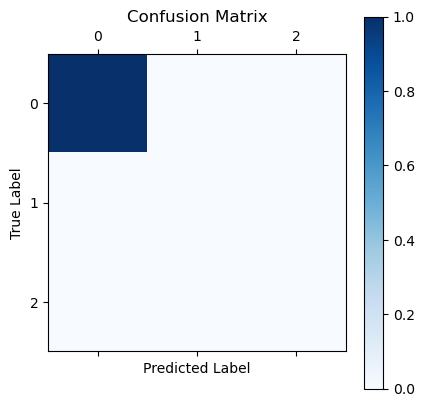

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
t.plot_confusion_matrix()
t.get_confusion_matrix()

In [ ]:
test_peaks = myPaths.get_peak_image_paths(dataset=dataset)[0]
test_water = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
test_overlay = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
param1, param2 = (0.5, 9000), (0.5, 9000, True)
f.assign_attributes(file_path=test_peaks, params=param1)

Attributes ['params'] assigned to c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5


In [ ]:
# t.save_model('../models/cnn3_test.pt')

In [ ]:
# test_model = m.BasicCNN3()
# test_model.load_state_dict(torch.load('../models/cnn3_test.pt'))
# test_model.eval()


In [ ]:
# for data, label, attribute in train_loader:
#     peak, _ = data
#     peak_image_attribute = attribute['peak']
#     output = test_model(peak)
#     print(peak_image_attribute)
#     print(torch.sigmoid(output).reshape(1,-1) > 0.5)
#     print('-------------------')

In [ ]:
"""
How I want the new training input to look.

learning_rate = 0.001
threshold = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = optim.Adam(model1.parameters(), lr=learning_rate)

cfg = {
    "loader": [train_loader, test_loader]
    'num_epochs': 2,
    'batch_size': train_loader.batch_size,
    'optimizer': optimizer,
    'device': device,
    'threshold': threshold
    }

peak_config = eval.Peak_Detection_Configuration()

t = train_eval.TrainTestModels(cfg, peak_config)
t.epoch_loop()
t.plot_loss_accuracy()
t.plot_confusion_matrix()
t.get_confusion_matrix()
t.save_model('../models/cnn_name.pt')
"""

'\nHow I want the new training input to look.\n\nlearning_rate = 0.001\nthreshold = 0.5\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\noptimizer = optim.Adam(model1.parameters(), lr=learning_rate)\n\ncfg = {\n    "loader": [train_loader, test_loader]\n    \'num_epochs\': 2,\n    \'batch_size\': train_loader.batch_size,\n    \'optimizer\': optimizer,\n    \'device\': device,\n    \'threshold\': threshold\n    }\n\npeak_config = eval.Peak_Detection_Configuration()\n\nt = train_eval.TrainTestModels(cfg, peak_config)\n'

In [ ]:
"""
How I want the pipeline to look.

cnn1_path = '../models/cnn1'
cnn2_path = '../models/cnn2'
cnn3_path = '../models/cnn3'

cnn1 = m.BasicCNN1()
cnn2 = m.BasicCNN2()
cnn3 = m.BasicCNN3()

pipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)
pipeline.run(image)
pipeline.evaluate_results(image_path)
"""

"\nHow I want the pipeline to look.\n\ncnn1_path = '../models/cnn1'\ncnn2_path = '../models/cnn2'\ncnn3_path = '../models/cnn3'\n\ncnn1 = m.BasicCNN1()\ncnn2 = m.BasicCNN2()\ncnn3 = m.BasicCNN3()\n\npipeline = pipe.ModelPipeline(cnn1_path, cnn2_path, cnn3_path, cnn1, cnn2, cnn3)\npipeline.run(image)\npipeline.evaluate_results(image_path)\n\n"